<a href="https://colab.research.google.com/github/Samarth-991/Computer-vision/blob/main/02_Super_Resolution_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Super Resolution
Super resolution encompases a set of algorithms and techniques used to enhance, increase, and upsample the resolution of an input image. More simply, take an input image and increase the width and height of the image with minimal (and ideally zero) degradation in quality.

In [2]:
# !pip install --upgrade opencv-python
# !pip install --upgrade opencv-contrib-python

In [10]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import time
import tensorflow as tf 
img_path ='/content/butterfly.JPG'
print(cv2.__version__)

4.4.0


In [7]:
# FSRCNN model download 
#!wget https://github.com/Saafke/FSRCNN_Tensorflow/raw/master/models/FSRCNN_x2.pb
FSRCNN_path = '/content/FSRCNN_x2.pb'
# EDSR model download 
#!wget https://raw.githubusercontent.com/Saafke/EDSR_Tensorflow/master/models/EDSR_x3.pb
EDSR_path = '/content/EDSR_x3.pb'

In [8]:
modelScale = 2
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(FSRCNN_path)
sr.setModel('fsrcnn', modelScale)

(240, 240, 3)


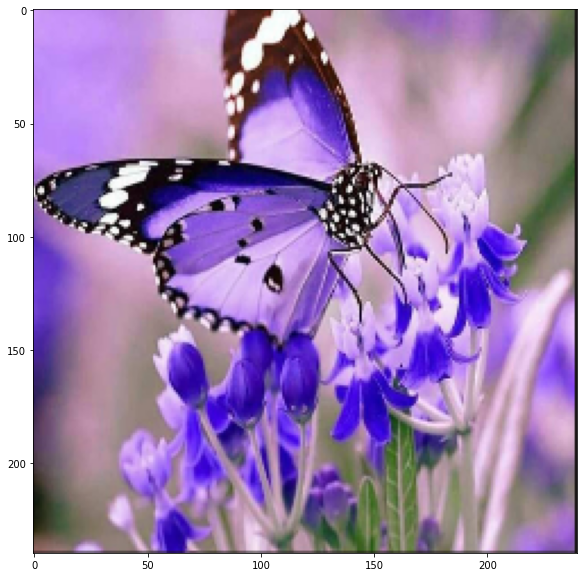

In [17]:
image = cv2.imread(img_path)
image = cv2.resize(img,(240,240))
print(image.shape)

plt.figure(figsize=(10,10))
plt.imshow(image)

[INFO] super resolution took 0.223392 seconds
image shape  (480, 480, 3)


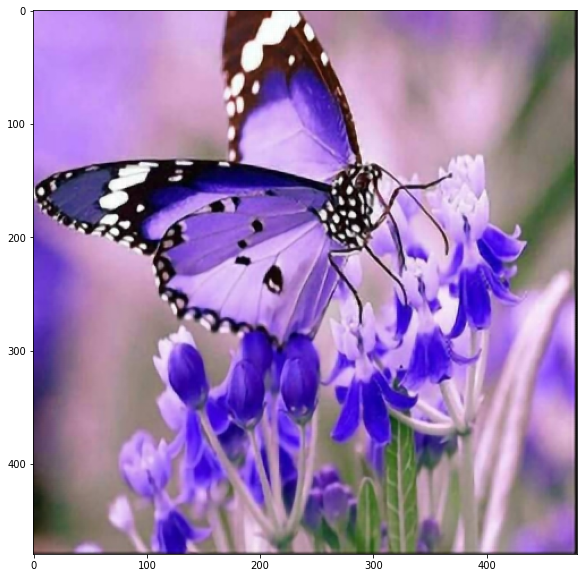

In [16]:
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] super resolution took {:.6f} seconds".format(
	end - start))
print("image shape ",upscaled.shape)

plt.figure(figsize=(10,10))
plt.imshow(upscaled)


In [19]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(EDSR_path)
sr.setModel('edsr', modelScale)

[INFO] super resolution took 79.894578 seconds
image shape  (720, 720, 3)


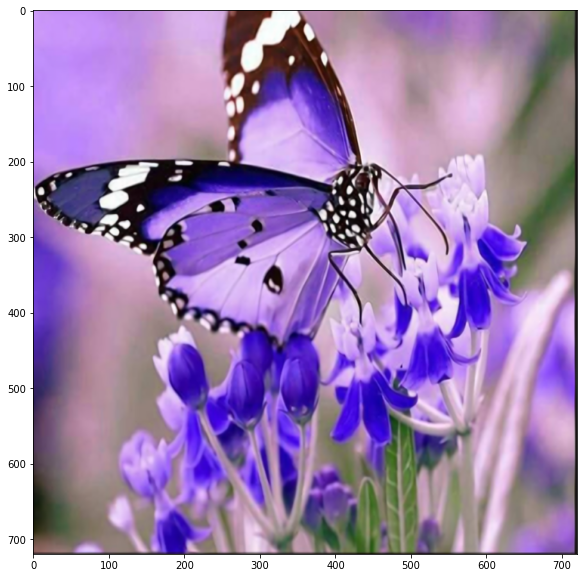

In [20]:
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] super resolution took {:.6f} seconds".format(
	end - start))
print("image shape ",upscaled.shape)

plt.figure(figsize=(10,10))
plt.imshow(upscaled)

In [22]:
# FSRCNN model download 
#!wget https://github.com/Saafke/FSRCNN_Tensorflow/raw/master/models/FSRCNN_x3.pb
FSRCNN3_path = '/content/FSRCNN_x3.pb'

In [23]:
modelScale =3
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(FSRCNN3_path)
sr.setModel('fsrcnn', modelScale)

[INFO] super resolution took 0.193331 seconds
image shape  (720, 720, 3)


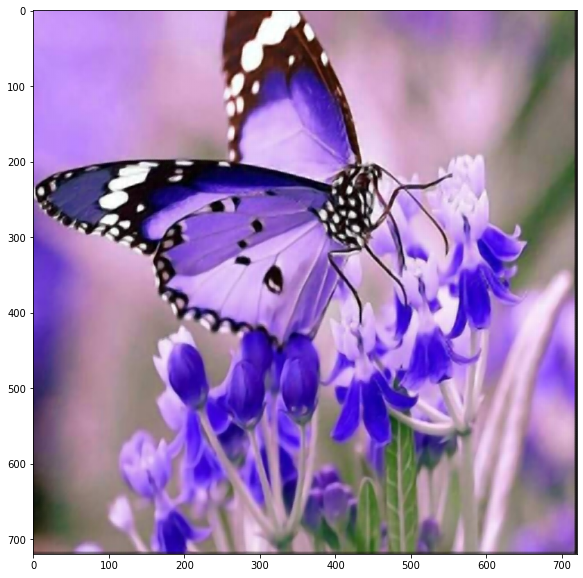

In [24]:
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] super resolution took {:.6f} seconds".format(
	end - start))
print("image shape ",upscaled.shape)

plt.figure(figsize=(10,10))
plt.imshow(upscaled)

In [39]:
import argparse
import imutils
import time
import cv2
from imutils.video import FileVideoStream
from imutils.video import VideoStream
from imutils.video import FPS
Video_path = '/content/my_video.avi'

In [28]:
modelScale =3
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(FSRCNN3_path)
sr.setModel('fsrcnn', modelScale)

In [53]:
fvs = FileVideoStream(Video_path).start()
time.sleep(1.0)
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (720,  720))
# start the FPS timer
fps = FPS().start()

# loop over frames from the video file stream
while fvs.more():
    frame = fvs.read() # grab the frame from the threaded video file stream, resize
    try:
        upscale_frame = sr.upsample(frame)
        out.write(upscale_frame)
        fps.update()
    #upscale_frame = np.dstack([upscale_frame,upscale_frame,upscale_frame])
    except:
        break
# do a bit of cleanup
cv2.destroyAllWindows()
fvs.stop()


TypeError: ignored